<a href="https://colab.research.google.com/github/dhguslee/leedo/blob/main/Machine%20Learning%20Code/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tensorflow**
---

## **1. Tensorflow ?**

### **1) Tensorflow Installation**

In [ ]:
# !pip install tensorflow
# !pip intall tensorflow-gpu   # GPU용 텐서플로.  (+ CUDA 툴킷과 NVIDIA cuDNN 설치 필요)
# !python -c "import tensorflow as tf ; print(tf.__version__)"   # Tensorflow version 확인

### **2) Tensorflow 1.x 방식의 저수준 API**
\
　　그래프 정의 단계와 실행 단계로 크게 나누어져 있다.

　　
$ z = w \times x + b$



In [ ]:
import tensorflow as tf

### 그래프 생성

g = tf.Graph()

with g.as_default() :
  x = tf.compat.v1.placeholder(dtype = tf.float32, 
                               shape = (None), 
                               name = "x")
  w = tf.Variable(2.0, name = "weight")
  b = tf.Variable(0.7, name = "bias")

  z = w * x + b

  init = tf.compat.v1.global_variables_initializer()


### 세션 만들고 그래프 g를 전달

with tf.compat.v1.Session(graph = g) as sess :

  # w 와 b를 초기화
  sess.run(init)

  # z를 평가
  for t in [1.0, 0.6, -1.8] :
    print("x = %4.1f --> z = %4.1f"%(t, sess.run(z, feed_dict = {x : t})))

In [ ]:
with tf.compat.v1.Session(graph = g) as sess :
  sess.run(init)
  print(sess.run(z, feed_dict = {x : [1., 2., 3.]}))

print(z)

### **3) Tensorflow 2.x 방식의 저수준 API**
\
　　즉시 실행 단계 방식

　　
$ z = w \times x + b$



w = tf.Variable(2.0, name = "weight")
b = tf.Variable(0.7, name = "bias")


### z를 평가
for x in [1.0, 0.6, -1.8] :
  z = w * x + b
  print("x = %4.1f --> z = %4.1f"%(x, z))

In [ ]:
print(z)

z = w * [1., 2., 3.] + b
print(z.numpy())

### **4) 배열 구조 다루기**
\
1. 3x2x3 크기의 간단한 랭크3 텐서 생성


2. 그 다음 크기를 바꾸도 텐서플로의 최적화된 연산을 사용해 각 열의 합을 계산.

In [ ]:
import tensorflow as tf
import numpy as np

x_array = np.arange(18).reshape(3, 2, 3)

x2 = tf.reshape(x_array, shape = (-1, 6))


### 각 열의 합을 계산
xsum = tf.reduce_sum(x2, axis = 0)

### 각 열의 평균을 계산
xmean = tf.reduce_mean(x2, axis = 0)

print("입력 크기 : ", x_array.shape)
print("크기가 변경된 입력:\n ", x2.numpy())
print("열의 합:\n", xsum.numpy())
print("열의 평균:\n", xmean.numpy())


### **5) Tensorflow 저수준 API로 간단한 모델 개발**
\
　　"최소 제곱법 (OLS, Ordinary Least Sqaures)"

In [ ]:
import tensorflow as tf
import numpy as np

X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3,
                    6.6, 7.4, 8.0,
                    9.0])

class TFLinreg(object) :

  def __init__(self, learning_rate = 0.01) :

    ### 가중치와 절편 정의
    self.w = tf.Variable(tf.zeros(shape = (1)))
    self.b = tf.Variable(tf.zeros(shape = (1)))

    ### 경사 하강법 옵티마이저를 설정
    self.optimizer = tf.keras.optimizers.SGD(lr = learning_rate)

  def fit(self, X, y, num_epochs = 10) :
    
    ### 비용 함수의 값을 저장하기 위한 리스트를 정의
    training_costs = []
    
    for step in range(num_epochs) :
    
      ### 자동 미분을 위해 연산 과정을 기록
      with tf.GradientTape() as tape :
        z_net = self.w * X + self.b
        z_net = tf.reshape(z_net, [-1])
        sqr_errors = tf.square(y - z_net)
        mean_cost = tf.reduce_mean(sqr_errors)

      ### 비용 함수에 대한 가중치의 그래디언트를 계산
      grads = tape.gradient(mean_cost, [self.w, self.b])

      ### 옵티마이저에 그래디언트 반영
      self.optimizer.apply_gradients(zip(grads, [self.w, self.b]))

      ### 비용 함수의 값 저장
      training_costs.append(mean_cost.numpy())

    return training_costs
  
  def predict(self, X) :
    return self.w * X + self.b

In [ ]:
lrmodel = TFLinreg()

training_costs = lrmodel.fit(X_train, y_train)

import matplotlib.pyplot as plt
plt.plot(range(1, len(training_costs) + 1), training_costs)
plt.tight_layout()
plt.xlabel("Epochs")
plt.ylabel("Training Cost")
plt.show()


In [ ]:
plt.scatter(X_train, y_train,
            marker = "s", s= 50,
            label = "Training Data")

plt.plot(range(X_train.shape[0]),
         lrmodel.predict(X_train),
         color = "gray", marker = "o",
         markersize = 6, linewidth = 3,
         label = "LinReg Model")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

## **2. tf.keras API로 다층 신경망 훈련**

### **1) Training data Preparation**

#### (1) Data Download

In [ ]:
!wget https://github.com/rickiepark/python-machine-learning-book-2nd-edition/raw/master/code/ch12/t10k-images-idx3-ubyte.gz
!wget https://github.com/rickiepark/python-machine-learning-book-2nd-edition/raw/master/code/ch12/t10k-labels-idx1-ubyte.gz
!wget https://github.com/rickiepark/python-machine-learning-book-2nd-edition/raw/master/code/ch12/train-images-idx3-ubyte.gz
!wget https://github.com/rickiepark/python-machine-learning-book-2nd-edition/raw/master/code/ch12/train-labels-idx1-ubyte.gz  

--2021-02-28 14:41:01--  https://github.com/rickiepark/python-machine-learning-book-2nd-edition/raw/master/code/ch12/t10k-images-idx3-ubyte.gz
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-2nd-edition/master/code/ch12/t10k-images-idx3-ubyte.gz [following]
--2021-02-28 14:41:02--  https://raw.githubusercontent.com/rickiepark/python-machine-learning-book-2nd-edition/master/code/ch12/t10k-images-idx3-ubyte.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1648877 (1.6M) [application/octet-stream]
Saving to: ‘t10k-images-idx3-ubyte.gz’

t10k-images-idx3-ub 

In [ ]:
# MNIST 데이터 압축을 푸는 코드

import sys
import gzip
import shutil
import os

if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = [f for f in os.listdir('./') if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read()) 

In [ ]:
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """`path`에서 MNIST 데이터 불러오기"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
 
    return images, labels

print("현재 경로 : ", os.getcwd())

현재 경로 :  /content


In [ ]:
X_train, y_train = load_mnist("/content/", kind = "train")
print("행 : %d, 열 : %d" %(X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist("/content/", kind = "t10k")
print("행 : %d, 열 : %d" %(X_test.shape[0], X_test.shape[1]))

행 : 60000, 열 : 784
행 : 10000, 열 : 784


#### (2) Regularization and One-Hot Encoding

In [ ]:
### 평균을 0으로 만들고 표준 편차로 나눈다.
mean_vals = np.mean(X_train, axis = 0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals) / std_val
X_test_centered = (X_test - mean_vals) / std_val

del X_train, X_test


print(X_train_centered.shape, y_train.shape)
print(X_test_centered.shape, y_test.shape)


### 일관된 결과 만들기위해 난수 초깃값 설정
np.random.seed(123)

y_train_onehot = tf.keras.utils.to_categorical(y_train)

print("처음 3개 레이블 : ", y_train[:3])

print("\n처음 3개 레이블(원-핫) :\n ", y_train_onehot[:3])

(60000, 784) (60000,)
(10000, 784) (10000,)
처음 3개 레이블 :  [5 0 4]

처음 3개 레이블(원-핫) :
  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### **2) FeedFoward 신경망 구성**

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Dense(                          # 완전 연결 층
        units = 50,                                 # 50개의 (은닉) 유닛
        input_dim = X_train_centered.shape[1],      # input = 훈련데이터 특성(열) 개수
        kernel_initializer = "glorot_uniform",      # 새로운 가중치 행렬 초기화 알고리즘 (default)
        bias_initializer = "zeros",                 # 절편은 일반적으로 0으로 초기화 (default)
        activation = "tanh"))                       # 활성화 함수 = tanh

model.add(
    tf.keras.layers.Dense(                          # 완전 연결층
        units = 50,                                 # 50개의 (은닉) 유닛 
        input_dim = 50,                             # input = 이전 층의 유닛 개수
        kernel_initializer = "glorot_uniform",
        bias_initializer = "zeros",
        activation = "tanh"))                       # 활성화 함수 = tanh

model.add(
    tf.keras.layers.Dense(                          # 완전 연결층
        units = y_train_onehot.shape[1],            # 유닛 개수 = 고유한 클래스 레이블의 개수
        input_dim = 50,                             # input = 이전 층의 유닛 개수
        kernel_initializer = "glorot_uniform",      
        bias_initializer = "zeros",
        activation = "softmax"))                    # 활성화 함수 = softmax

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_12 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


### **3) Feed Foward 신경망 Training**

#### (1) Model Compile

In [ ]:
### 최적화에 사용할 경사 하강법 옵티마이저
sgd_optimizer = tf.keras.optimizers.SGD(    # SGD = 확률적 경사 하강법
    lr = 0.001,                            
    decay = 1e-7, 
    momentum = .9)      # momentum : Epochs마다 학습률을 조절하기 위한 학습률 감쇠 상수.


### Model Compile

model.compile(optimizer = sgd_optimizer,            # 최적화에 사용할 경사 하강법 옵티마이저
              loss = "categorical_crossentropy")    # 최적화 손실 함수 정의. 
                                                      # (이진 크로스 엔트로피 = 로지스틱 손실 함수의 기술적인 표현)

#### (2) Model.fit
\
- 미니 배치 경사 하강법 사용


- 배치마다 담긴 훈련 샘플 개수 = 64개


- 50번의 Epochs 동안 MLP(Multi Layer Perceptron) 훈련

In [ ]:
history = model.fit(X_train_centered, y_train_onehot,
                    batch_size = 64,          # Batch가 64개 X, Batch 1개에 64개의 샘플
                    epochs = 50,
                    verbose = 1,              # 훈련과정 출력
                    validation_split = 0.1)   # (훈련 데이터 중) 검증 데이터 비율

Epoch 1/50
844/844 [==============================] - 2s 2ms/step - loss: 1.1070 - val_loss: 0.3604
Epoch 2/50
844/844 [==============================] - 1s 2ms/step - loss: 0.3897 - val_loss: 0.2740
Epoch 3/50
844/844 [==============================] - 1s 2ms/step - loss: 0.3072 - val_loss: 0.2383
Epoch 4/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2712 - val_loss: 0.2160
Epoch 5/50
844/844 [==============================] - 1s 2ms/step - loss: 0.2479 - val_loss: 0.1998
Epoch 6/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2246 - val_loss: 0.1891
Epoch 7/50
844/844 [==============================] - 2s 2ms/step - loss: 0.2085 - val_loss: 0.1783
Epoch 8/50
844/844 [==============================] - 2s 2ms/step - loss: 0.1968 - val_loss: 0.1699
Epoch 9/50
844/844 [==============================] - 2s 2ms/step - loss: 0.1830 - val_loss: 0.1638
Epoch 10/50
844/844 [==============================] - 1s 2ms/step - loss: 0.1721 - val_loss: 0.1574

#### (3) Class label Predict

In [ ]:
y_train_pred = model.predict_classes(X_train_centered, verbose = 0)

print("처음 3개 예측 : ", y_train_pred[:3])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


처음 3개 예측 :  [5 0 4]


#### (4) Model Accuracy of Train set and Test set 

In [ ]:
### Train set Model Accuracy

y_train_pred = model.predict_classes(X_train_centered, 
                             verbose = 0)

correct_preds = np.sum(y_train == y_train_pred, axis = 0)

train_acc = correct_preds / y_train.shape[0]

print("처음 3개 예측 : ", y_train_pred[:3])

print("훈련 정확도 : %.2f%%" % (train_acc * 100))

### Test set Model Accuracy

y_test_pred = model.predict_classes(X_test_centered, 
                             verbose = 0)

correct_preds = np.sum(y_test == y_test_pred, axis = 0)

test_acc = correct_preds / y_test.shape[0]

print("훈련 정확도 : %.2f%%" % (test_acc * 100))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


처음 3개 예측 :  [5 0 4]
훈련 정확도 : 98.93%
훈련 정확도 : 96.35%


## **3. 다층 신경망의 활성화 함수 선택**

### **1) 로지스틱 함수**
\
- 큰 음수 값이 들어오면 문제가 발생

  - 시그모이드 함수의 출력이 0이 되기 때문이다.
  
  - 시그모이드 함수가 0에 가까운 출력을 내면 신경망이 매우 느리게 학습한다.

\
- 이런 이유로 은닉층에 하이퍼볼릭 탄젠트 함수를 더 선호.

$$ z = w_0x_0 + w_1x_1 + \cdots + w_mx_m  = \sum_{i=0}^{m} w_ix_i = w^Tx$$
$$ \phi_{logistic}(z) = {1 \over 1+e^{-z}}$$

In [1]:
import numpy as np

X = np.array([1, 1.4, 2.5])   # 첫 번째 원소는 1이어야 한다.
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w) :
  return np.dot(X, w)

def logistic(z) :
  return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w) :
  z = net_input(X, w)
  return logistic(z)


print("P(y=1|x) = %.3f" % logistic_activation(X, w)) # 0.888 : 샘플 x가 양성 클래스에 속할 확률이 88.8%

P(y=1|x) = 0.888


- 여러 개의 로지스틱 활성화 유닛으로 구성된 출력층은 의미 있게 해석할 만한 확률값을 만들지 못한다.


In [4]:
### W : (n_output_units, n_hidden_units + 1) 크기의 배열
  

W = np.array([[1.1, 1.2, 0.8, 0.4],    # 첫 번째 열은 절편 유닛
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

### A : (n_hidden_units + 1, n_samples) 크기의 배열

A = np.array([[1, 0.1, 0.4, 0.6]])    # 첫 번째 열은 1이다.


Z =  np.dot(W, A[0])
y_probas = logistic(Z)

print("최종 입력 : \n", Z)
print("출력 유닛 : \n", y_probas)   # 세 확률 값의 합이 1이 아니기에, 결과 확률을 이해하기 힘들다.

y_class = np.argmax(Z, axis = 0)
print("예측 클래스 레이블 : %d" % y_class)  # 클래스 레이블로 예측값으로 가장 큰 값 선택.

최종 입력 : 
 [1.78 0.76 1.65]
출력 유닛 : 
 [0.85569687 0.68135373 0.83889105]
예측 클래스 레이블 : 0


### **2) 소프트맥스 함수**
\
- 다중 클래스 확률 예측에 사용
  - Multinomial logistic regression에서 의미있는 클래스 확률을 계산 가능.

\
- 특정 샘플의 최종 입력이 z일 때, i번째 클래스에 속할 확률을 M개의 선형 함수 합으로 나누어 정규화 한 것.

$$ P(y=i|z) = \phi(z) = {e^{Z_i} \over \sum_{j=1}^M e^{Z_j}}$$

In [7]:
def softmax(z) :
  return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)

print("확률 :\n", y_probas)

np.sum(y_probas)    # 세 확률의 합 = 1

확률 :
 [0.44668973 0.16107406 0.39223621]


1.0

### **3) 하이퍼볼릭 탄젠트 함수** 
\
- 출력 범위가 (-1, 1) 사이로 로지스틱 함수에 비해 넓다.
    - 역전파 알고리즘의 수렴을 향상시킬 수 있다.


$$ \phi_{logistic}(z) = {1 \over 1+e^-z}$$

$$ \phi_{tanh}(z) = 2 \times \phi_{logistic}(2z) -1 = {e^z - e^{-z} \over e^z + e^{-z}}$$

로지스틱 함수와 하이퍼볼릭 탄젠트 그래프 비교

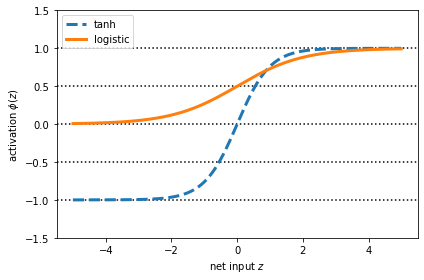

In [9]:
import matplotlib.pyplot as plt

def tanh(z) :
  e_p = np.exp(z)
  e_m = np.exp(-z)
  return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)

log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel("net input $z$")
plt.ylabel("activation $\phi(z)$")
plt.axhline(1, color = "black", linestyle = ":")
plt.axhline(0.5, color = "black", linestyle = ":")
plt.axhline(0, color = "black", linestyle = ":")
plt.axhline(-0.5, color = "black", linestyle = ":")
plt.axhline(-1, color = "black", linestyle = ":")

plt.plot(z, tanh_act,
         linewidth = 3, linestyle = "--",
         label = "tanh")
plt.plot(z, log_act,
         linewidth = 3, 
         label = "logistic")

plt.legend()
plt.tight_layout()
plt.show()

In [10]:
tanh_act = np.tanh(z)

from scipy.special import expit
log_act = expit

### **4) 렐루 활성화 함수**
\
- 심층 신경망에서 자주 사용되는 활성화 함수

\
- 하이퍼볼릭 탄젠트 함수의 경우,
\
최종 입력이 $z_1 = 20 \rightarrow z_2 = 25$ 가정 시, 　$ \phi(z_1)\approx 1.0 , \phi(z_2)\approx 1.0 $으로 출력에 변화가 없다.
  - 이는 최종 입력에 대한 활성화 하무의 도함수가 z가 커짐에 따라 줄어든다는 뜻.
  - 결국 그래디언트가 0에 아주 가까워져 훈련 과정 동안 가중치가 매우 느리게 학습된다.

\
- 렐루 활성화는 이런 문제를 해결.

\
- 입력값이 양수면 입력에 대한 렐루의 도함수는 항상 1
  - 이것이 그래디언트 소실 문제를 해결.

$$ \phi(z) = max(0, z) $$